# Marginal Stability Vehicle Sizing
This sheet uses <code>numpy, matplotlib, and simulations</code>.

<code>simulations</code> is developed and maintained (no promises) by Cameron. The current version of the code is 0.0.1 and can be downloaded from github [here](https://github.com/cmflannery/simulations). The source-code is not currently on pip.

In [2]:
import simulations as sim
import matplotlib.pyplot as plt
import numpy as np
import math as math
import tanksim

In [3]:
def plot_alt(fig):
    # plot altitude
    ax1 = fig.add_subplot(3,1,1)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,kmaltitude)
    ax1.set_ylabel('Altitude (km)')

    ax1.set_title('Altitude and Velocity')

    # plot velocity
    kmVel = [x/1000 for x in velocity]
    ax2 = fig.add_subplot(3,1,2)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,kmVel)
    ax2.set_ylabel('Velocity (km/s)')

    # plot acceleration
    gees = [x/g0 for x in acceleration]
    ax3 = fig.add_subplot(3,1,3)
    ax3.xaxis.grid(linewidth=1.0)
    ax3.yaxis.grid(linewidth=1.0)
    ax3.grid(True, linewidth=1)
    ax3.plot(time,gees)
    ax3.set_ylabel('Acceleration (gees)')
    ax3.set_xlabel('Time (s)')
    
def plot_thrust(fig):
    # plot thrust
    ax = fig.add_subplot(2,1,1)
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    ax.grid(True, linewidth=1)
    ax.plot(time,thrust)
    ax.set_ylabel('Thrust (N)')
    
    ax.set_title('Thrust and Drag')
    
    # plot drag
    ax1 = fig.add_subplot(2,1,2)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,drag)
    ax1.set_ylabel('Drag (N)')
    ax1.set_ylim(0,2e5)

In [4]:
burntime = 33# s

nengines = 1
thrust_sl = 22441  # N
Isp = 260
g0 = 9.81
mdot = nengines*thrust_sl/(g0*Isp)
twratio = 50  # estimated thrust 2 weight ratio
mixtureratio = 2.23

def kgToLb(kg):
    return kg * 2.20462

def lbToKg(lb):
    return lb / 2.20462

mstructure = 70.76  # kg
mavionics = 9.97  # kg
msystems = 30.75 #kg
mmisc = 11 #kg
mengine = thrust_sl/(twratio*g0)
mpropulsion = mengine + 4.5 # kg
mpropellant = mdot*burntime

diameter = 8 #in

mRP1 = mpropellant / (mixtureratio + 1)
mLOx = mpropellant - mRP1

tankpressure = 750 #psi
fos = 4
pressurantdiameter = diameter - 2 #in
HEinitialpressure = 4500 #psi
HEfinalpressure = 50 #psi

tank = tanksim.tank(diameter,tankpressure,fos,pressurantdiameter,HEinitialpressure,HEfinalpressure,kgToLb(mLOx),kgToLb(mRP1))
tankSpecs = tank.tankCalc()
mtank = lbToKg(tankSpecs['tank_mass'])

m0 = mpropulsion + mpropellant + mstructure + mavionics + msystems + mmisc + mtank

if diameter == 8:
    refArea = .0325 #m^2
elif diameter == 15:
    refArea = .114 #m^2
else:
    refArea = .05 #m^2
#reference area of .05 for 10" rocket, .0325 for 8" rocket, .114 for 15" rocket

print('### STRUCTURAL PARAMETERS ###')
print('Propellant Mass = %.2f kg' % mpropellant)
print('Propulsion Mass = %.2f kg' % mpropulsion)
print('Tank Mass = %.2f kg' % mtank)
print('Structural Mass (inc. Tank) = %.2f kg' % (mstructure + mtank))
print('Systems Mass = %.2f kg' % msystems)
print('Misc Mass = %.2f kg' % mmisc)
print('Avionics Mass = %.2f kg' % mavionics)
print('Mass Propellant Ratio (Mprop/M0) %.2f' % (mpropellant/m0))
print('Total Wet Mass: %.2f kg' % (m0))
print('Total Dry Mass: %.2f kg' % (m0-mpropellant))
print('\n### ENGINE PARAMETERS ###')
print('Thrust = %d N' % thrust_sl)
print('Isp = %d s' % Isp)
print('mdot = %.2f kg/s' % mdot)
print('Total Impulse = %i Ns' % (thrust_sl*burntime))

print('\n### OTHER IMPORTANT THINGS ###')
print('Burn Time = %.2f s' % burntime)

initialConditions = {
    'time': 0,
    'velocity': 0,
    'flight_angle': 0,
    'flight_heading': np.deg2rad(90),
    'latitude': 0,
    'longitude': 0,
    'altitude': 0,
    'mass': m0,
    'heat': 0,
    'lift_coefficient': 0,
    'bank_angle': 0,
    'reference_area': refArea
}

engines = {
    'thrust_sl': thrust_sl,
    'thrust_angle': 0,
    'Isp': Isp,
    'Ae': 0.25,
    'nengines': nengines
}

### STRUCTURAL PARAMETERS ###
Propellant Mass = 290.34 kg
Propulsion Mass = 50.25 kg
Tank Mass = 132.56 kg
Structural Mass (inc. Tank) = 203.32 kg
Systems Mass = 30.75 kg
Misc Mass = 11.00 kg
Avionics Mass = 9.97 kg
Mass Propellant Ratio (Mprop/M0) 0.49
Total Wet Mass: 595.63 kg
Total Dry Mass: 305.29 kg

### ENGINE PARAMETERS ###
Thrust = 22441 N
Isp = 260 s
mdot = 8.80 kg/s
Total Impulse = 740553 Ns

### OTHER IMPORTANT THINGS ###
Burn Time = 33.00 s


In [5]:
itsatest = sim.Rocket(initialConditions, engines, burntime)
altitude, velocity, acceleration, mass, time, thrust, drag, Q, rho = itsatest.run()

Apogee = 103 km
Max Velocity = 1.31 km/s
Max Acceleration = 5.91 gees
Max Q = 152092.85 Pa


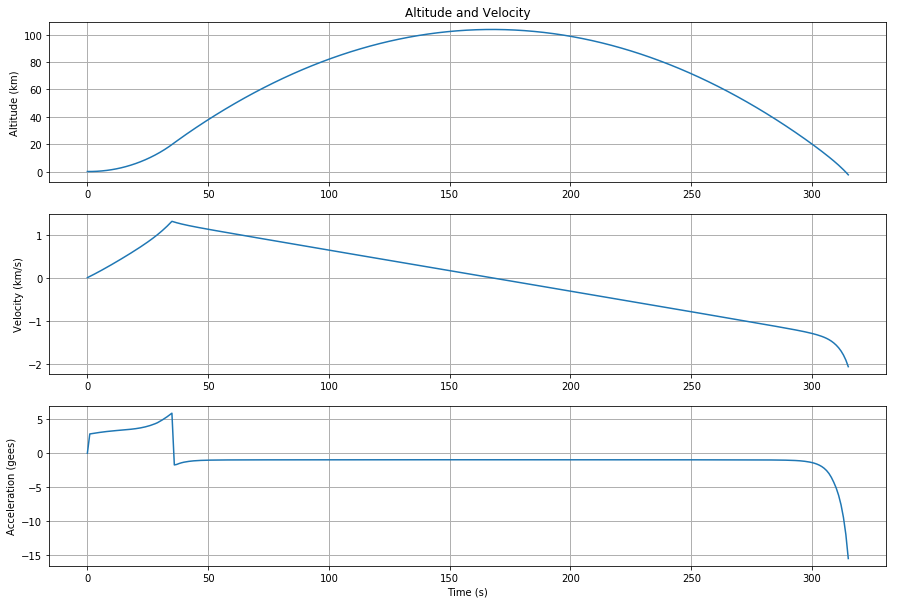

In [6]:
kmaltitude = [x/1000 for x in altitude]
print('Apogee = %d km' % max(kmaltitude))
kmvelocity = [v/1000 for v in velocity]
print('Max Velocity = %.2f km/s' % max(kmvelocity))
gees = [a/g0 for a in acceleration]
print('Max Acceleration = %.2f gees' % max(gees))
print('Max Q = %.2f Pa' % max(Q))

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2)

# fig2 = plt.figure(figsize=(15,10))
# fig2.subplots_adjust(hspace=0.2)

plot_alt(fig)
plt.show()

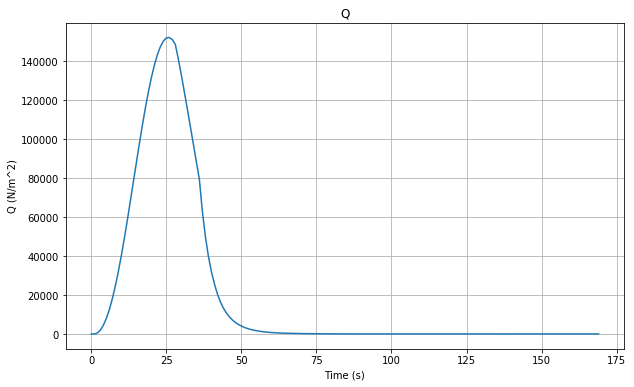

In [10]:
fig1 = plt.figure(figsize=(10,6))
ax11 = fig1.add_subplot(1,1,1)
Qtime = time[0:(len(Q))]
ax11.plot(Qtime,Q)
ax11.set_title('Q')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Q (N/m^2)')
ax11.grid()
plt.show()